In [2]:
# 1. Histogramas

In [3]:
"""This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data.
If n_hist is not provided the default value is 100."""
function super_histograma(vec::Array,n_hist=100)
    N_ord = sort(vec)
    
    dx = (N_ord[end]-N_ord[1])/n_hist
    x_1 = N_ord[1]

    histo = zeros(n_hist)
      
    for k = 1 : length(N_ord)
        
        x_1 = N_ord[1]
        
        for j = 1 : length(histo)
            
            x_2 = x_1 + dx
            
            if N_ord[k] >= x_1 && N_ord[k] <= x_2
                
                histo[j] += 1
                break
                
            else
                x_1 += dx
            
            end
        end
    end
    return histo
end

super_histograma (generic function with 2 methods)

Nuestra función está bien documentada. Veamos esto:

In [4]:
?super_histograma

search: super_histograma



This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data. If n_hist is not provided the default value is 100.


Probemos ahora con un vector `M` de ~ 10,000 entradas.

In [5]:
M = randn(10000);

Saquemos el histograma de `M` con nuestra gran función `super_histograma()`. 

In [6]:
h = super_histograma(M,100)

100-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 1.0
 ⋮  
 4.0
 6.0
 2.0
 3.0
 4.0
 3.0
 4.0
 0.0
 0.0
 1.0
 0.0
 0.0

Finalmente, grafiquemos el histograma de `M`.

**Nota:** Se graficó histograma vs rango($n_{hist}$) con fines ilustrativos solamente.

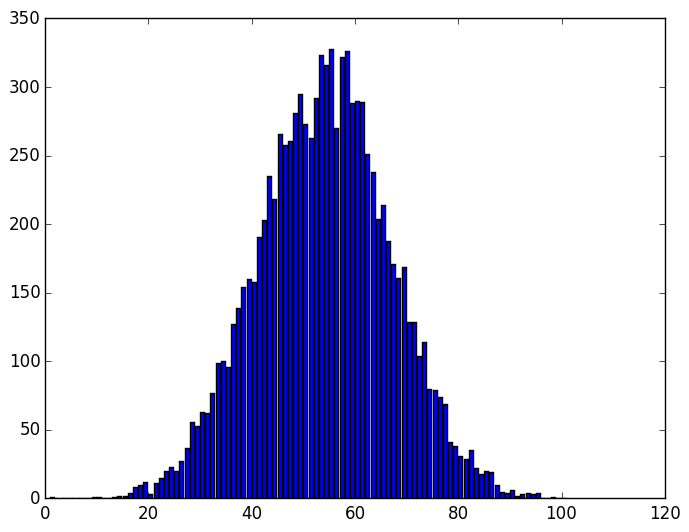

In [7]:
using PyPlot
bar(1:100,h);

# 2. Promedio y Varianza

#### a)Definir funciones para calcular promedio y varianza, comparando con *mean* y *var*

Para un conjunto de n números ${x_1,x_2,...,x_n}$, su promedio o media aritmética esta dada por $\bar{x}=\frac{1}{n}\sum\limits_{i=1}^n x_i$. Además, su varianza se calcula a partir del promedio y está dada por $\sigma_n^2=\frac{1}{n}\sum\limits_{i=1}^n (\bar{x}-x_i)^2$.

In [8]:
"This function calculates the arithmetic mean over all the elements of an array"

function promedio(S::Array) #el argumento es un array de cualquier dimensión
    sum=0.0
    for j in S  #el for corre sobre los elementos del array y los va sumando
        sum+=j
        #println(j)
    end 
    #println("suma=",sum)
    return sum/length(S)
end    

promedio (generic function with 1 method)

In [9]:
promedio(M) #la función calcula el promedio de todos los elementos del arreglo M, definido anteriormente

-0.006889806437680143

In [10]:
Q=rand(10); #creamos un vector de 10 entradas

10-element Array{Float64,1}:
 0.490437 
 0.151816 
 0.90279  
 0.544765 
 0.0369667
 0.742674 
 0.607743 
 0.245285 
 0.0969969
 0.453523 

In [11]:
promedio(Q') #la función también puede calcularlo con su conjugado

0.42729979455609896

In [12]:
P=rand(3,3,4);

In [13]:
promedio(P) #también funciona con arreglos de mayores dimensiones

0.4456546709413305

A continuación definiremos la función varianza

In [14]:
"Esta función calcula la varianza de un arreglo n dimensional de números" 

function varianza(S::Array) #el argumento es un array de cualquier dimensión
    sum=0.0
    for j in S  #el for corre sobre los elementos del array y los va sumando
        sum+=(promedio(S)-j)^2
        #println(j)
    end 
    #println("suma=",sum)
    return sum/length(S)
end    

varianza (generic function with 1 method)

In [15]:
varianza(M), varianza(Q),varianza(Q'),varianza(P),varianza([NaN]),varianza([0.1]) #ejemplos de ejecución de la función

(0.996740186652756,0.07470647143630468,0.07470647143630468,0.0956004786614061,NaN,0.0)

A continuación compararemos con las funciones *mean* y *var* que tiene Julia

In [16]:
T1=[mean(M),promedio(M)] 

2-element Array{Float64,1}:
 -0.00688981
 -0.00688981

In [17]:
abs(T1[1]-T1[2]) #hay una pequeña diferencia numérica

1.0408340855860843e-17

In [18]:
T2=[var(M),varianza(M)]

2-element Array{Float64,1}:
 0.99684
 0.99674

In [19]:
abs(T2[1]-T2[2]) #la diferencia es ahora mucho mayor pues se acumula con cada llamada a promedio en varianza

9.968398706361459e-5

In [20]:
@time promedio(M);
@time varianza(M);

  0.000058 seconds (150 allocations: 10.729 KB)
  0.377045 seconds (5 allocations: 176 bytes)


In [21]:
@time mean(M); #la diferencia en tiempo en promedio no es muy significativa 
@time var(M); #la diferencia en tiempo en varianza sí lo es

  0.000024 seconds (5 allocations: 176 bytes)
  0.000046 seconds (8 allocations: 288 bytes)


0.9968398706398196

#### b) Implementar método para hacer los cálculos con una sola lectura de datos

A continuación definiremos una función que calcula ambos valores: promedio y varianza con una sola lectura de los datos del array y devuelve una tupla con ambos resultados

In [22]:
"""
Esta función calcula el promedio y la varianza de un conjunto de datos con una sola lectura array 
y devuelve una tupla con ambos resultados. 
Fuente: https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm
"""
function unalectura(S::Array)
    n = 0
    mean = 0.0
    M2 = 0.0
     
    for x in S
        n += 1
        delta = x - mean
        mean += delta/n
        M2 += delta*(x - mean)
    end
    
    if n < 2
        return [NaN,NaN]
    else
        return [mean,M2 / n] #dividimos entre n pues si tomamos n-1 estamos calculando la correción de Bessel de la varianza
    end
end    

unalectura (generic function with 1 method)

In [23]:
promedio(M),varianza(M), unalectura(M) 

(-0.006889806437680143,0.996740186652756,[-0.006889806437680124,0.9967401866527571])

In [24]:
abs(promedio(M)-unalectura(M)[1]) #diferencia en los resultados es muy pequeña

1.9081958235744878e-17

In [25]:
abs(varianza(M)-unalectura(M)[2]) #la diferencia también es muy pequeña, aunque trés órdenes de magnitud mayor

1.1102230246251565e-15

In [26]:
@time promedio(M);
@time varianza(M);

  0.000047 seconds (5 allocations: 176 bytes)
  0.377458 seconds (5 allocations: 176 bytes)


In [27]:
@time unalectura(M); #es mucho más veloz que el cálculo con varianza() puesto que debe realizar menos iteraciones

  0.000348 seconds (7 allocations: 272 bytes)


2-element Array{Float64,1}:
 -0.00688981
  0.99674   

#### c) Comparar ambos algoritmos para datos de distintas longitudes con diferentes órdenes de magnitud 

A continuació generaremos distintos arreglos aleatorios de datos de 1 dimensión para evaluar los algoritmos 

In [28]:
A=rand(10); #en 0:1

10-element Array{Float64,1}:
 0.59098  
 0.693069 
 0.527324 
 0.29513  
 0.725549 
 0.0182964
 0.302518 
 0.245168 
 0.508152 
 0.545102 

In [38]:
B=rand(10^4);

In [37]:
C=rand(-typemax(Int64):typemax(Int64),10); #rangos máximos de enteros

10-element Array{Int64,1}:
 -2403009847316992293
 -8357592661525893981
  1046534662520323075
  8780676150063094216
 -2247211253976478071
 -5010659890304722783
  3484227145918744324
  5877665929402322119
  9047613084883502447
 -4828404367960823290

In [39]:
D=rand(-typemax(Int64):typemax(Int64),10^4);

In [40]:
E=rand(-eps(1.0):eps(1.0),10);

In [41]:
F=rand(-eps(1.0):eps(1.0),10^4);

A continuación evaluaremos los datos en las distintas funciones

In [70]:
@time promedio(A);
@time unalectura(A)
promedio(A),varianza(A),unalectura(A)

  0.000014 seconds (5 allocations: 176 bytes)
  0.000009 seconds (7 allocations: 272 bytes)


(0.4451287294723508,0.04471123908776299,[0.4451287294723508,0.044711239087763005])

In [72]:
@time promedio(B);
@time unalectura(B)
promedio(B),varianza(B),unalectura(B)

  0.000066 seconds (5 allocations: 176 bytes)
  0.000347 seconds (7 allocations: 272 bytes)


(0.5025070016947537,0.08283133846614259,[0.5025070016947519,0.08283133846614309])

In [73]:
@time promedio(C);
@time unalectura(C)
promedio(C),varianza(C),unalectura(C)

  0.000013 seconds (5 allocations: 176 bytes)
  0.000011 seconds (7 allocations: 272 bytes)


(5.389838951703074e17,3.32930541294527e37,[5.389838951703076e17,3.32930541294527e37])

In [75]:
@time promedio(D);
@time unalectura(D)
promedio(D),varianza(D),unalectura(D)

  0.000078 seconds (5 allocations: 176 bytes)
  0.000485 seconds (7 allocations: 272 bytes)


(4.6310127561484424e16,2.8425325540571184e37,[4.6310127561484456e16,2.8425325540571264e37])

In [76]:
@time promedio(E);
@time unalectura(E)
promedio(E),varianza(E),unalectura(E)

  0.000009 seconds (5 allocations: 176 bytes)
  0.000009 seconds (7 allocations: 272 bytes)


(-2.220446049250313e-16,0.0,[-2.220446049250313e-16,0.0])

In [78]:
@time promedio(F);
@time unalectura(F)[1]
promedio(F),varianza(F),unalectura(F)

  0.000068 seconds (5 allocations: 176 bytes)
  0.000239 seconds (8 allocations: 288 bytes)


(-2.220446049250313e-16,0.0,[-2.220446049250313e-16,0.0])

# 3. Método de Simpson para integrar

El *método de Simpson* es un método de integración numérica para la aproximación de integrales definidas en un intervalo *(a,b)*.

Sigue esta forma:
$$\int_a^b f(x)dx \approx \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]$$
Definiremos ahora la función `simpson()` que nos permitirá aproximar la integral de cualquier función en un intervalo *(a,b)*:

In [79]:
"""This is the Simpson's rule for numerical integration, proposed by mathematician Thomas Simpson.
It accepts as parameters function f and two numbers a,b that define the interval inside which the integral of f will be approximated."""
function simpson(f::Function,a,b)
    integral = (b-a)/6 * (f(a)+4*f((a+b)/2)+f(b));
    return integral
end

simpson (generic function with 1 method)

In [80]:
?simpson

search: simpson



This is the Simpson's rule for numerical integration, proposed by mathematician Thomas Simpson. It accepts as parameters function f and two numbers a,b that define the interval inside which the integral of f will be approximated.


Definamos nuestra función prueba como $f(x) = x^2$.

In [81]:
f(x) = x^2

f (generic function with 1 method)

Sabemos que la integral de $f(x) = x^2$ es $\frac{x^3}{3}$ y, evaluada de 0 a 1, nos da un valor de $\approx 0.333333$. Veamos si nuestra función es acertada.

In [82]:
simpson(f,0,1)

0.3333333333333333

Además, veamos que si tomamos el intervalo inverso (i.e., el (1,0)), nos da el negativo de la integral.

In [83]:
simpson(f,1,0)

-0.3333333333333333

Vemos que el ejecutar simpson integrando de 0 a 0 nos devuelve el resultado trivial

In [84]:
simpson(f,0,0)

0.0

Sin embargo, el método no es capaz de calcular de manera precisa integrales impropias

In [85]:
g(x)=exp(-x^2)

g (generic function with 1 method)

In [86]:
simpson(g,0,Inf)

Inf